In [1]:
import pandas as pd

In [2]:
bird_data = pd.read_csv("bird_tracking.csv")

In [3]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ix = bird_data.bird_name == "Eric"

In [6]:
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

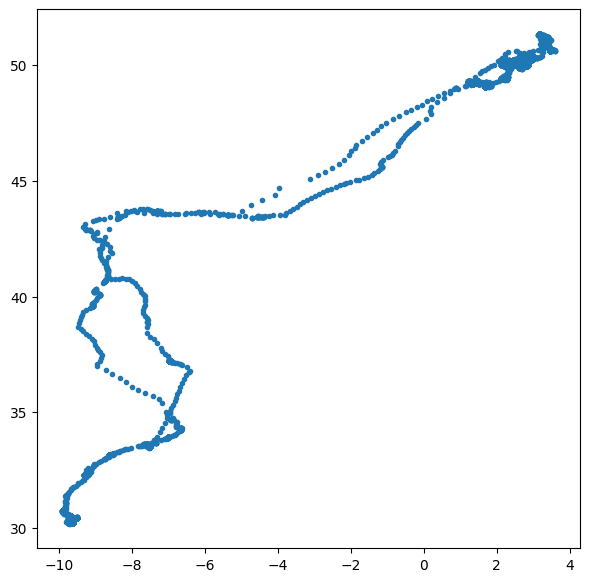

In [7]:
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")

In [8]:
bird_names = pd.unique(bird_data.bird_name)

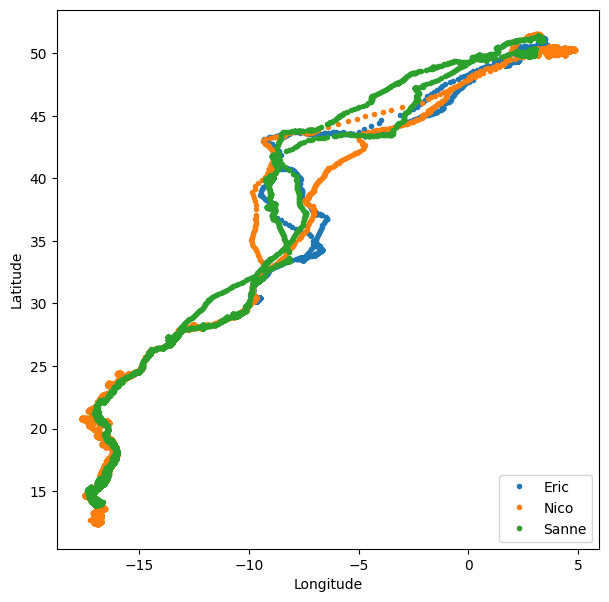

In [9]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = ix = bird_data.bird_name == bird_name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    plt.plot(x, y, ".", label = bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

Text(0, 0.5, 'Frequency')

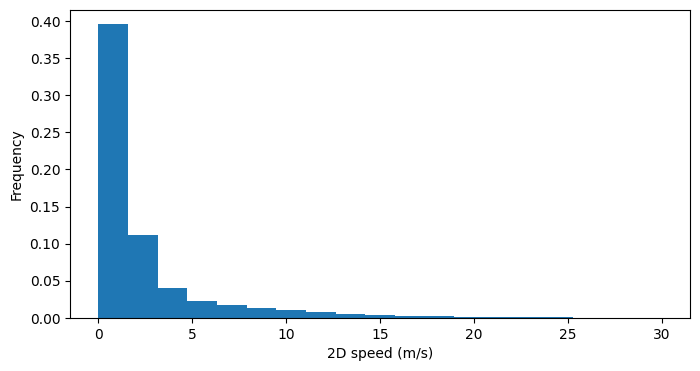

In [10]:
plt.figure(figsize=(8,4))
speed = bird_data.speed_2d[bird_data.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30,  20), density= True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

In [11]:
import datetime

In [12]:
timestamps = []
for k in range(len(bird_data)):
    date_str = bird_data.date_time[k]
    tmp = datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")
    timestamps.append(tmp)

In [13]:
bird_data["timestamp"] = pd.Series(timestamps, index=bird_data.index)

In [14]:
data = bird_data[bird_data.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

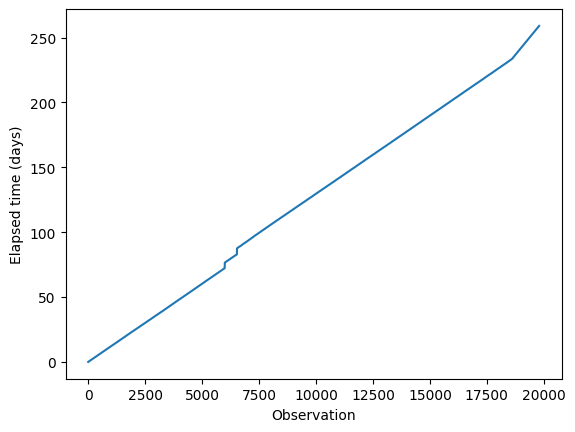

In [15]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

In [16]:
next_day = 1
inds = []
daily_mean_speed = []
for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds = []

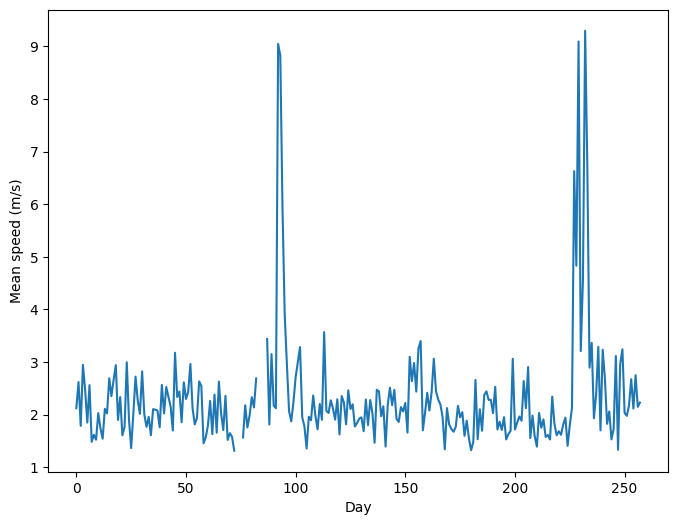

In [17]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
proj = ccrs.Mercator()

/usr/local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


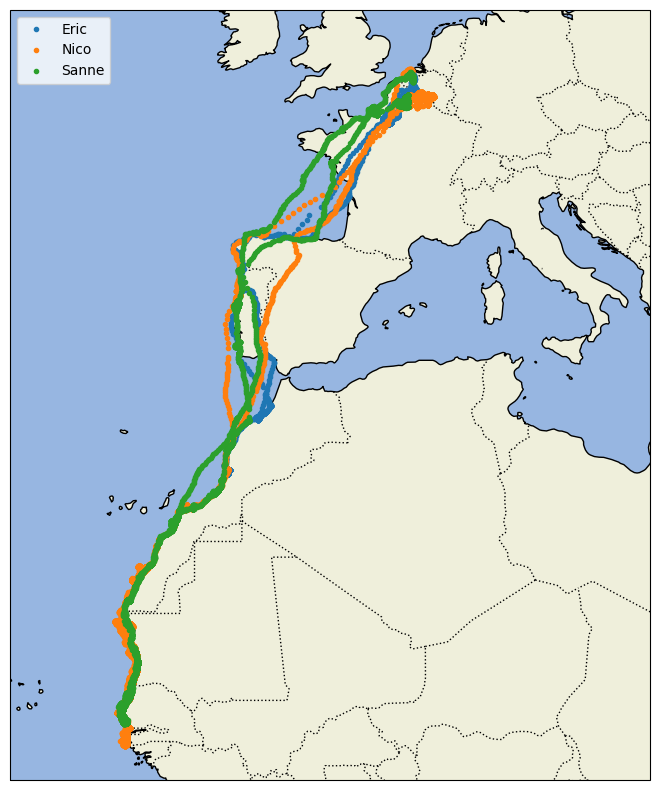

In [24]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
for name in bird_names:
    ix = bird_data["bird_name"] == name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    ax.plot(x, y, ".", transform=ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
